ZUM_NLP: PROJECT GUIDELINES <br>
The aim of the project is to create a model of sentiment analysis based on tweets about current events in the world. <br>
The full project consists of 4 stages, but depending on the expected final grade, it is enough to follow the stages indicated below: <br>
3 – stages 1B, 2 and 3 <br>
4 – stages 1B, 2-4 <br>
5 – stages 1A, 2-4 <br>
STAGE 1: DATA COLLECTION <br>

1A – data in Polish/English/Spanish/Swedish or Portuguese (so that I can understand it)
Data acquisition concerns the collection of tweets. Each person scraps tweets (about 20k) to create a dataset for further processing. Tweets should be about current events, such as the war, NATO etc.
1.	Adding class labels: Collected data is not tagged as positive/negative/neutral.<br>
a.	Select the number of target classes (2 or 3 if we include neutral).<br>
b.	Clean data and remove stopwords<br>
c.	Create word embeddings for vectorized representation of words simillar in meaning // OR we use pretrained model for language of choice <br>
d.	Use K-MEANS to create clusters and use k=2 or k=3 depending on the numer of target classes <br>
e.	Based on clusters tag data and manually fix clusters if necessary <br>
It is a good idea to limit the number of words as much as possible and possibly manually tag some of them too.<br>
2.	Data cleaning: normalisation, special characters removal, punctuation, URL, emails, duplicates, lowercase text and choose type of tokenizer. NOTICE: this stage is necessary BEFORE the creation of word embeddings.<br>
1B – ready data<br>
Use ready dataset (from Kaggle etc.)<br>
ETAP 2: CLASSIC ML<br>
Choose 3 models to fit data and present the results with confusion matric and roc curve. Just as in class. <br>
ETAP 3: NEURAL MODEL<br>
Choose type of neural network to train, and through validation decide on the best set of parameters. It is not enough to just build a model and get results. Fine-tuning is necessary too. <br>
In a loop we save the best model according to cost of validation. <br>
ETAP 4: LANGUAGE MODEL <br>
The last stage is to use selected language model, e.g. BERT, to create a sentiment analysis classifier. <br>

DEADLINE: check assigments in Teams <br>
SUBMISSION: GitHub repository – if its private, make sure to share with dwnuk@pjwstk.edu.pl. Then add url to repo in Teams assigment.
NOTICE! If you aim for 4 or 5, the project can be done in groups of up to 3 ppl, but with the requirement of using more advanced models (e.g., usage of two neural networks for comparison) and more than 1 language model. <br>
BEFORE SUBMISSION MAKE SURE THAT THE REPOSITORY CONTAINS: <br>
- scripts/python files .py, <br>
- README.md file with z project description and instructions how to use it, <br>
- saved models (as long as possible due to storage limits) <br>
- data used in the project in csv format or compressed <br>
- you can briefly describe achieved results in README file along with project overview, without going into too much detail.<br>

<br><br><br>



In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [1]:
# !pip install tweepy --upgrade
# !pip install matplotlib
# !pip install pandas
# !pip install wordcloud
!pip install clean-text
!pip install spacy --upgrade
!python -m spacy download pl_core_news_lg
!python -m spacy download en_core_web_md
!pip install transformers==4.26.1
!pip install -U datasets
!pip install plot_keras_history -q
!pip install unidecode -q
!pip install tensorflow

     -------------------------------------- 175.4/175.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 53.1/53.1 kB 2.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171059 sha256=bdb600d12be160aeb52203165c4e331c378f7abfb718151e9c189b8bbe36f55b
  Stored in directory: c:\users\marci\appdata\local\pip\cache\wheels\37\b1\70\d87e2dddea71a019314970e3ea065b63e27b9be29e4a579b13
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.2.0
    Uninstalling emoji-2.2.0:
      Successfully uninstalled emoji-2.2.0



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\marci\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     --------------------------------------- 12.2/12.2 MB 72.5 MB/s eta 0:00:00
     ------------------------------------- 480.9/480.9 kB 31.4 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 2.4 MB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 47.1 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 75.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\marci\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 187, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 146, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 110, in _get_module_details
    __import__(pkg_name)
  File "C:\Users\marci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\

     ---------------------------------------- 6.3/6.3 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.29.2
    Uninstalling transformers-4.29.2:
      Successfully uninstalled transformers-4.29.2



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\marci\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     -------------------------------------- 474.6/474.6 kB 7.5 MB/s eta 0:00:00
     --------------------------------------- 21.5/21.5 MB 65.6 MB/s eta 0:00:00
     -------------------------------------- 134.3/134.3 kB 8.3 MB/s eta 0:00:00
     -------------------------------------- 110.5/110.5 kB 6.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\marci\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\marci\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\marci\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\marci\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [91]:
from cleantext import clean
from datasets import Dataset, load_metric

from datetime import datetime, timedelta
from gensim.models import Word2Vec
from keras.models import Sequential
from gensim.models.phrases import Phrases, Phraser
from keras import backend as K
from keras import layers, regularizers
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from IPython.display import display
from plot_keras_history import show_history, plot_history
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from tensorflow.keras.optimizers import RMSprop, Adam
from time import time
from tqdm import tqdm
from transformers import AutoModelForSequenceClassification, AutoTokenizer, BertModel, BertTokenizerFast, pipeline, TrainingArguments, Trainer, RobertaForSequenceClassification
from unidecode import unidecode
from wordcloud import WordCloud, STOPWORDS
import emoji
import keras
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd
import re
import spacy
import tensorflow as tf
import tensorflow_datasets as tfds
import torch
import transformers
import tweepy
import pickle



tqdm.pandas()

In [ ]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
# wandb.init(project="", entity="")

# schowane

Pobieranie tweetów:<br>
  1) W języku angielskim --> ok 200 tyś.<br>
  2) W języku polskim --> ok 200 tyś.<br>

In [ ]:
def create_word_cloud(lista):
  comment_words = ''
  stopwords = set(STOPWORDS)
  
  for item in lista:
      
      tokens = item["cleaned_tweet"].split()
      tokens = [token.lower() for token in tokens]
      comment_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

def get_old_data(last_days_num):
       now = datetime.now()
       then = now - timedelta(days=last_days_num)
       month = str(then.month).zfill(2)
       day = str(then.day).zfill(2)
       start_date = f"{then.year}-{month}-{day}T00:00:00Z"
       return start_date

class UserStats(object):
    def __init__(self, user):
        self.client = client
        self.username = user
        user = self.client.get_user(username=user, user_fields=["created_at", "public_metrics", "verified"])
        self.id = user.data.id
        self.created = user.data.created_at
        self.followers_number = user.data.public_metrics["followers_count"]
        self.followed_number = user.data.public_metrics["following_count"]
        self.tweet_number = user.data.public_metrics["tweet_count"]
        self.if_verified = user.data.verified

    def get_tweets(self, previous_days=30):
        self.previous_days = previous_days
        old_data = get_old_data(previous_days)
        query = f"from:{self.username}"
        self.last_tweets = self.client.search_all_tweets(query, start_time=old_data, max_results=300, tweet_fields=["public_metrics"])
        self.processed_tweets = [clean_tweet(tweet.text) for tweet in self.last_tweets.data]

    def calculate_popularity(self):
        self.popularity_score = sum([tt.public_metrics["retweet_count"] for tt in self.last_tweets.data]) + \
                                sum([tt.public_metrics["like_count"] for tt in self.last_tweets.data])
        self.reach_score = self.followers_number - self.followed_number

    def get_followers(self, max_results=100):
        followers = self.client.get_users_followers(self.id, max_results=max_results)
        return [follower.username for follower in followers.data]

    def print_basic_stats(self):
        print(f"Popularity score: {self.popularity_score}")
        print(f"Reach score: {self.reach_score}")



# Pobieranie tweetów

In [ ]:
academic_bearer = "AAAAAAAAAAAAAAAAAAAAADIEawEAAAAAxzzD4cQ2g8FGK2%2BkKz2%2FJvTnoMA%3D09uegYs5HrQvrsFkAEl3WwxhspBYFBIH3Vnykec79asqiUsSoA"
import tweepy
client = tweepy.Client(academic_bearer)
api = tweepy.API(academic_bearer)

In [ ]:
#Pobieranie tweetów po keyword
def get_tweets_keyword(language, keyword):
  tweets = []
  query =  'lang:' + language + ' ' + keyword
  tweet_fields = ['created_at']
  max_result = 500
  number_of_wanted_tweets = 60000
  iterations = (number_of_wanted_tweets / max_result)

  response = client.search_all_tweets(query=query, max_results=max_result, media_fields=None)
  next_token = response.meta['next_token']
  for i in range(int(iterations)):
    time.sleep(1)
    response = client.search_all_tweets(query=query, max_results=max_result, media_fields=None, next_token = next_token)
    tweets.extend(response.data)
    if(response.meta.get('next_token') == None):
      return tweets
    next_token = response.meta['next_token']

      
  return tweets

tweets_en = get_tweets_keyword('en', 'eurovision')

tweets_pl = get_tweets_keyword('pl', 'pis')


Zapisanie danych do csv

In [ ]:
pd.DataFrame(tweets_en).to_csv('eurovision.csv', index=False)
pd.DataFrame(tweets_pl).to_csv('pis_raw.csv', index=False)

# Funkcje pomocnicze


In [44]:
def create_tfidf_dictionary(x, transformed_file, features):
    vector_coo = transformed_file[x.name].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

def replace_tfidf_words(x, transformed_file, features):
    dictionary = create_tfidf_dictionary(x, transformed_file, features)   
    return list(map(lambda y:dictionary[f'{y}'], x.title.split()))



In [45]:
def replace_sentiment_words(word, sentiment_dict):

    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out

In [46]:
def predict(model, texts_to_test, tokenizer, sequence_length=200):

    sequences = tokenizer.texts_to_sequences(texts_to_test)
    padded = pad_sequences(sequences, maxlen=200, dtype='int32', value=0)
    prediction = model.predict(padded,batch_size=1,verbose = 2)[0]

    print(prediction)

    pred_labels = []
    
    if np.argmax(prediction) == 2:
        pred_labels.append(1)
    elif np.argmax(prediction) == 1:
        pred_labels.append(0) 
    else:
        pred_labels.append(-1)

    for i in range(1):
        print(texts_to_test)
        if pred_labels[i] == 1:
            s = 'Positive'
        elif(pred_labels[i] == 0):
            s = 'Neutral'
        else:
            s = 'Negative'
        print("Predicted sentiment : ",s)

# Dobre 

Wczytanie danych z csv i wstępne czysczenie

In [ ]:

RETWEETED_REGEX = r"^RT @([^ ]+):"
USER_REGEX = r"@([^ ]+)"
URL_REGEX = r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"
CHARACTER_REGEX = r"[^a-zA-Z\s']"

def clean_tweet(tweets):
    cleaned_tweets = []
    for t in tweets:
      t = re.sub(RETWEETED_REGEX, "", t)
      t = re.sub(USER_REGEX, "", t)
      t = re.sub(URL_REGEX, "", t)
      # t = re.sub(CHARACTER_REGEX, "", t)
      tw = emoji.replace_emoji(t, replace='')
      cleaned_tweets.append(tw.strip().replace('\n', ' '))
      
    return cleaned_tweets

tweets_en_clean = clean_tweet(pd.read_csv('eurovision.csv', encoding="utf-8")['text'])
tweets_pl_clean =  clean_tweet(pd.read_csv('pis_raw.csv', encoding="utf-8")['text'])

FileNotFoundError: ignored

Zapisanie danych do df

In [ ]:
tweets_en_df = pd.DataFrame(tweets_en_clean, columns=['text'])
tweets_pl_df = pd.DataFrame(tweets_pl_clean, columns=['text'])

# Usunięcie duplikatów

In [ ]:
tweets_en_df.drop_duplicates(inplace=True)
tweets_pl_df.drop_duplicates(inplace=True)

# Modele

Wczytanie modeli

In [ ]:
nlp_en = spacy.load("en_core_web_md", disable=['ner', 'parser'])
nlp_en.add_pipe('sentencizer')

nlp_pl = spacy.load("pl_core_news_lg", disable=['ner', 'parser'])
nlp_pl.add_pipe('sentencizer')

Usunięcie stop wordów

In [ ]:
def remove_stopwords_en(text):
  return ' '.join(filter(lambda x: x not in nlp_en.Defaults.stop_words, text.split()))

def remove_stopwords_pl(text):
  return ' '.join(filter(lambda x: x not in nlp_pl.Defaults.stop_words, text.split()))

tweets_en_df['text'] = tweets_en_df['text'].apply(remove_stopwords_en)
tweets_pl_df['text'] = tweets_pl_df['text'].apply(remove_stopwords_pl)

Lematyzacja

In [ ]:
def lemmatize_en(text):
  return ' '.join([x.lemma_ for x in nlp_en(text)])

def lemmatize_pl(text):
  return ' '.join([x.lemma_ for x in nlp_pl(text)])

tweets_en_df['text_lemmatized'] = tweets_en_df['text'].progress_apply(lemmatize_en)
tweets_pl_df['text_lemmatized'] = tweets_pl_df['text'].progress_apply(lemmatize_pl)

100%|██████████| 19560/19560 [02:56<00:00, 110.93it/s]


In [ ]:
tweets_pl_df

,text,text_lemmatized
0,Od czasu wpuszczenia ukraińskiego zboża polski...,od czas wpuszczeć ukraiński zboże polski rynek...
1,Za nikt tyle odbierze ukradnie PIS.. wolę mieć...,za nikt tyle odebrać ukradnie PIS . . woleć mi...
2,Minister Podpisała dokument przyspieszyć trans...,minister podpisać dokument przyspieszyć transf...
3,Pozytywny przekaz majstrowania komisarzach. Pi...,pozytywny przekaz majstrować komisarza . PiS w...
5,Platforma media atakują kłamstwami manipulacja...,platforma media atakować kłamstwo manipulacj d...
...,...,...
59968,Mów siebie. Za długo obserwuje scenę polityczn...,mów siebie . za długo obserwować scena polityc...
59969,"Dla kogo eldorado, emerytów rządzących, dzięki...","dla kto eldorado , emeryt rządzący , dzięki pr..."
59972,Przestań dziewczę bełkotać! Bzdury gaworzysz !...,Przestań dziewczę bełkotać ! Bzdura gaworzyć !...
59974,Czyli woli Pan PiS likwidację państwa?,czyli woleć pan PiS likwidacja państwo ?


Chmury słów

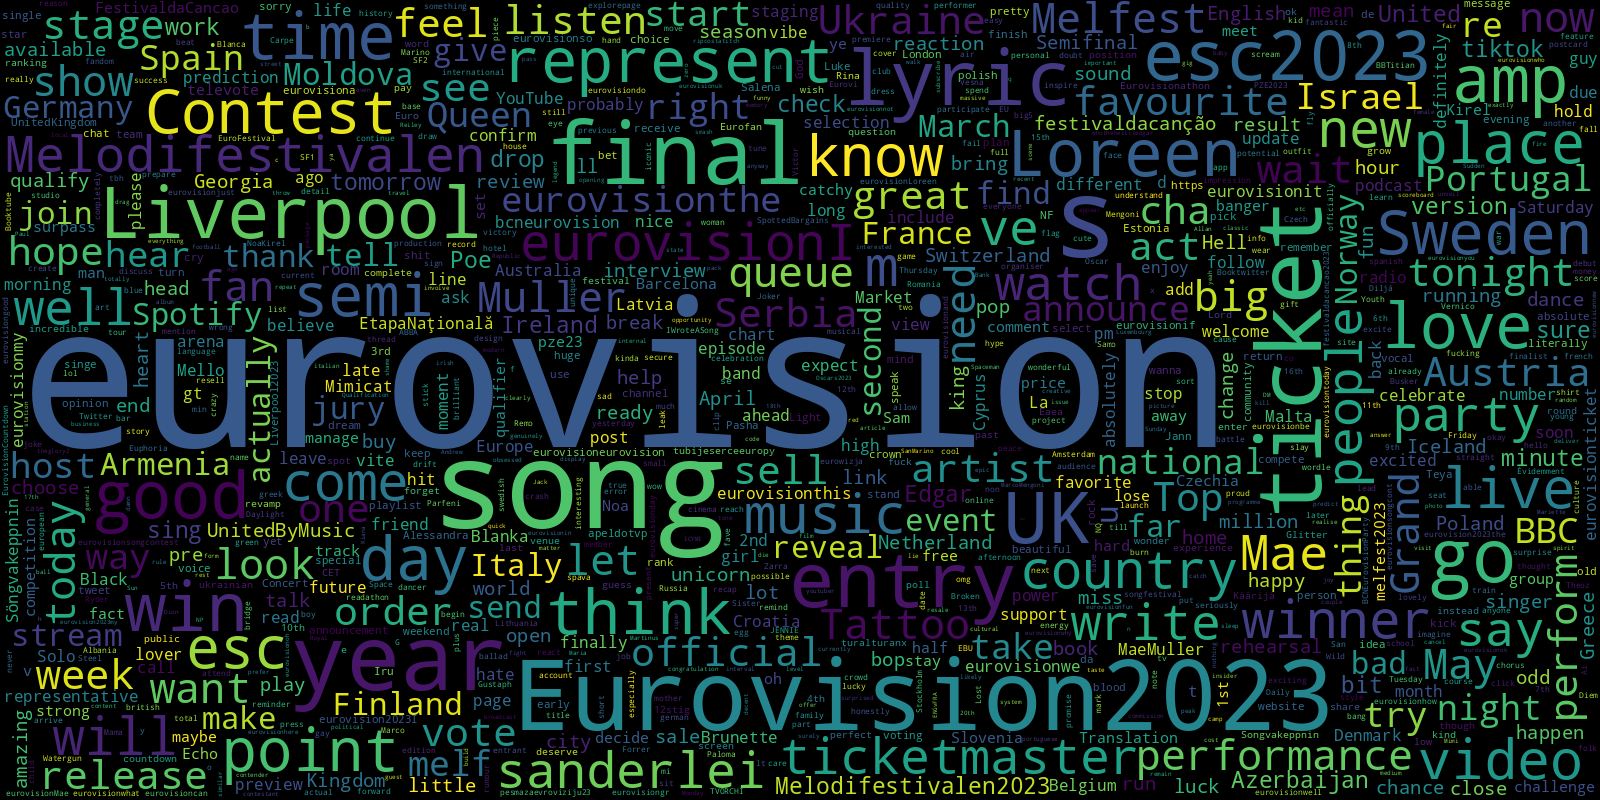

In [ ]:
text = ''.join(tweets_en_df['text_lemmatized'])
wc = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(text)
wc.to_image()

Klasyfikacja

In [ ]:
# Define pipeline
classifier_en = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis") 
classifier_pl = pipeline(model="bardsai/twitter-sentiment-pl-base") 

In [ ]:
tweets_en = []
for tweet in tweets_en_df['text_lemmatized'].to_list():
   try:
     sentiment = classifier_en(tweet)
     tweets_en.append({'tweet': tweet, 'sentiment': sentiment[0]['label']})
 
   except:
     pass

In [ ]:
tweets_pl = []
# for tweet in tmp['text']:
for tweet in tweets_pl_df['text_lemmatized'].to_list():
   try:
     sentiment = classifier_pl(tweet)
     tweets_pl.append({'tweet': tweet, 'sentiment': sentiment[0]['label']})
 
   except:
     pass

In [ ]:
tweets_en

In [ ]:
pd.DataFrame(tweets_en).to_csv('tweets_with_labels_en.csv', index=False)

In [ ]:
pd.DataFrame(tweets_pl).to_csv('tweets_with_labels_pl.csv', index=False)

# Wczytanie i obróbka przygotowanych danych z pliku CSV

In [19]:
tweets_en = pd.read_csv('tweets_with_labels_en.csv')
tweets_pl = pd.read_csv('tweets_with_labels_pl.csv')

Otagowanie dataframów

In [20]:
conditions_en = [
    (tweets_en['sentiment'] == 'POS'),
    (tweets_en['sentiment'] == 'NEU'),
    (tweets_en['sentiment'] == 'NEG')
]
values = [1,0,-1]

tweets_en['target'] = np.select(conditions_en, values) 

conditions_pl = [
    (tweets_pl['sentiment'] == 'positive'),
    (tweets_pl['sentiment'] == 'neutral'),
    (tweets_pl['sentiment'] == 'negative')
]

tweets_pl['target'] = np.select(conditions_pl, values) 

In [21]:
data_pl = tweets_pl.dropna().drop_duplicates().reset_index(drop=True)
data_en = tweets_en.dropna().drop_duplicates().reset_index(drop=True)

In [22]:
def clean_data(text):

  text = unidecode(text)
  text = str(text)
  text = text.lower()

  text = re.sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)
  text = re.sub(r"\+", " plus ", text)
  text = re.sub(r",", " ", text)
  text = re.sub(r"\.", " ", text)
  text = re.sub(r"!", " ! ", text)
  text = re.sub(r"\?", " ? ", text)
  text = re.sub(r"'", " ", text)
  text = re.sub(r":", " : ", text)
  text = re.sub(r"\s{2,}", " ", text)

  return text

In [23]:
data_pl.tweet = data_pl.tweet.apply(lambda x: clean_data(x))
data_en.tweet = data_en.tweet.apply(lambda x: clean_data(x))

# KMeans - Język Polski

In [111]:
file_cleaned_pl = data_pl.rename(columns={'tweet':'title', 'target':'rate'})

In [112]:
file_cleaned_pl.rate.value_counts()/len(file_cleaned_pl)
file_cleaned_pl[file_cleaned_pl.rate==0]
file_cleaned_pl = file_cleaned_pl[file_cleaned_pl.rate!=0]
file_cleaned_pl.rate.value_counts()/len(file_cleaned_pl)


-1    0.897321
 1    0.102679
Name: rate, dtype: float64

In [113]:
def text_to_word_list(text):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    text = clean_data(text)
    text = text.split()

    return text  


In [114]:
file_cleaned_pl.title = file_cleaned_pl.title.apply(lambda x: text_to_word_list(x))
file_model_pl = file_cleaned_pl.copy()
file_model_pl = file_model_pl[file_model_pl.title.str.len()>1]


In [115]:
sent = [row for row in file_model_pl.title]
phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = Phraser(phrases)
sentences_pl = bigram[sent]
sentences_pl[1]

['na',
 'czekac',
 'i',
 '100',
 'i',
 'wielki',
 'nadzieja',
 'wy',
 'rowniez',
 'wyjdzmy',
 'pokazmy',
 'sprzeciw',
 '!_!',
 '!',
 'w_czerwiec',
 'wielki_marsz']

In [116]:
w2v_model_pl = Word2Vec(min_count=3,
                     window=4,
                     vector_size=300,
                     sample=1e-4, 
                     alpha=0.15, 
                     min_alpha=0.006, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)

w2v_model_pl.build_vocab(sentences_pl, progress_per=50000)


In [117]:
w2v_model_pl.train(sentences_pl,
                total_examples=w2v_model_pl.corpus_count,
                epochs=30,
                report_delay=1)

w2v_model_pl.init_sims(replace=True)

C:\Users\marci\AppData\Local\Temp\ipykernel_18852\948541947.py:6: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model_pl.init_sims(replace=True)


In [118]:
w2v_model_pl.save("word2vec_pl.model")

In [119]:
file_export_pl = file_model_pl.copy()
file_export_pl['old_title'] = file_export_pl.title
file_export_pl.old_title = file_export_pl.old_title.str.join(' ')
file_export_pl.title = file_export_pl.title.apply(lambda x: ' '.join(bigram[x]))
file_export_pl.rate = file_export_pl.rate.astype('int8')

In [120]:
file_export_pl[['title', 'rate']].to_csv('cleaned_dataset_pl.csv', index=False)

In [121]:
word_vectors_pl = Word2Vec.load("word2vec_pl.model").wv

model_pl = KMeans(n_clusters=2,
               max_iter=1000,
               random_state=True,
               n_init=50)
model_pl.fit(X=word_vectors_pl.vectors.astype('double'))

pickle.dump(model_pl, open('kmeans_pl.model', 'wb'))

In [122]:
word_vectors_pl.similar_by_vector(model_pl.cluster_centers_[1], topn=10, restrict_vocab=None)

[('pretensja_socjalny', 0.5155904293060303),
 ('0_9', 0.49926018714904785),
 ('bandyci', 0.4865492582321167),
 ('symbol_wiarygodnosc', 0.47806239128112793),
 ('przyszlosctopolskabezpis', 0.4745359420776367),
 ('kochani_23', 0.47165244817733765),
 ('nie_dosc', 0.4641127288341522),
 ('kazdy_cal', 0.4634011387825012),
 ('245_miliard', 0.4630691707134247),
 ('zdolny_kazdy', 0.4548528790473938)]

In [123]:
positive_cluster_index = 1
positive_cluster_center_pl = model_pl.cluster_centers_[positive_cluster_index]
negative_cluster_center_pl = model_pl.cluster_centers_[1-positive_cluster_index]

In [124]:
words_pl = pd.DataFrame(word_vectors_pl.index_to_key)
words_pl.columns = ['words']
words_pl['vectors'] = words_pl.words.apply(lambda x: word_vectors_pl[f'{x}'])
words_pl['cluster'] = words_pl.vectors.apply(lambda x: model_pl.predict([np.array(x)]))
words_pl.cluster = words_pl.cluster.apply(lambda x: x[0])
words_pl['cluster_value'] = [1 if i==positive_cluster_index else -1 for i in words_pl.cluster]
words_pl['closeness_score'] = words_pl.apply(lambda x: 1/(model_pl.transform([x.vectors]).min()), axis=1)
words_pl['sentiment_coeff'] = words_pl.closeness_score * words_pl.cluster_value

In [125]:
words_pl[words_pl.cluster != 1].sample(10)

,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
4221,ktore,"[-0.0067127817, -0.06460778, 0.044748224, 0.05...",0,-1,1.019841,-1.019841
7467,zajmowac_dziecko,"[-0.066413105, 0.08363947, -0.094646305, 0.094...",0,-1,1.019525,-1.019525
8560,jedziemy_aferypis,"[-0.0058858315, -0.0023058285, 0.031664547, 0....",0,-1,1.119921,-1.119921
7763,usa_nato,"[0.123852655, 0.0034207448, -0.08273272, 0.020...",0,-1,1.075855,-1.075855
2741,przyglup,"[0.095999666, -0.019126954, 0.016828777, 0.009...",0,-1,1.021612,-1.021612
488,swiety,"[-0.00050422666, -0.068042055, -0.022259163, -...",0,-1,1.013195,-1.013195
6639,upolitycznianie,"[-0.08092383, -0.026526572, -0.06103731, 0.004...",0,-1,1.032542,-1.032542
8056,hak,"[0.003789153, 0.01943163, -0.1380874, -0.09847...",0,-1,1.007058,-1.007058
5219,skierowac,"[0.0033860225, 0.0028840117, -0.095585234, -0....",0,-1,1.017098,-1.017098
5959,!_tiktok,"[0.029145151, -0.0060980753, -0.07653204, 0.02...",0,-1,1.032997,-1.032997


In [126]:
words_pl[['words', 'sentiment_coeff']].to_csv('sentiment_dictionary_pl.csv', index=False)

In [127]:
final_file_pl = pd.read_csv('cleaned_dataset_pl.csv')
sentiment_map_pl = pd.read_csv('sentiment_dictionary_pl.csv')
sentiment_dict_pl = dict(zip(sentiment_map_pl.words.values, sentiment_map_pl.sentiment_coeff.values))

In [128]:
file_weighting_pl = final_file_pl.copy()
tfidf_pl = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf_pl.fit(file_weighting_pl.title)
features_pl = pd.Series(tfidf_pl.get_feature_names_out())
transformed_pl = tfidf_pl.transform(file_weighting_pl.title)

C:\Users\marci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [129]:
replaced_tfidf_scores_pl = file_weighting_pl.apply(lambda x: replace_tfidf_words(x, transformed_pl, features_pl), axis=1)

In [130]:
replaced_closeness_scores_pl = file_weighting_pl.title.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict_pl), x.split())))

In [131]:
replacement_df_pl = pd.DataFrame(data=[replaced_closeness_scores_pl, replaced_tfidf_scores_pl, file_weighting_pl.title, file_weighting_pl.rate]).T
replacement_df_pl.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence', 'sentiment']
replacement_df_pl['sentiment_rate'] = replacement_df_pl.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df_pl['prediction'] = (replacement_df_pl.sentiment_rate>0).astype('int8')
replacement_df_pl['sentiment'] = [1 if i==1 else 0 for i in replacement_df_pl.sentiment]

In [132]:
replacement_df_pl[replacement_df_pl['prediction'] == 0].sample(10)

,sentiment_coeff,tfidf_scores,sentence,sentiment,sentiment_rate,prediction
4005,"[1.001259455079491, -1.0153267755459534, 1.012...","[4.336869523059032, 8.821001380670067, 2.65139...",w co_grozic ? on pisac stac pis przegrac_wybor...,0,-8.036031,0
3639,"[0.999538385172757, -1.0292790930880498, -1.02...","[5.112319299259951, 4.865918885781474, 7.94553...",z papiez sztandar niszczycie kraj czlowiek to ...,1,-7.850874,0
9547,"[-1.054085006456018, 1.012829786133263, 1.0124...","[9.044144931984277, 3.4644151059980546, 1.0674...",emerytom_dobrze po pis,1,-4.943657,0
2906,"[-1.0260202252678243, 0, -1.0307030538579265, ...","[5.7957103048745315, 9.331827004436057, 8.8210...",jan_pawel ii_autorytet mlody_osoba dzis_druzyn...,1,-18.099597,0
6703,"[0.9987915672394896, -0.9978056979650074, 1.00...","[4.813668195437596, 5.265653319180653, 5.54009...",nikt wy nic ukrasc sam wyzbyliscie flaga porow...,0,-34.538915,0
5132,"[0, -1.013083351228199, 1.0044304133712931, 1....","[9.737292112544221, 6.518416287676021, 5.68550...",trujace pis_owski kremowka pis trupami trup uw...,0,-7.969617,0
6483,"[-0.9981015565453838, 0, -1.0031141800217076, ...","[5.018793241249128, 9.331827004436057, 5.63464...",prawda wy_wyzwolic klamstwo i cynizm nie zapis...,0,-19.178617,0
8993,"[-1.0106798383021969, 1.012472950305816, -1.06...","[7.722389092001957, 3.2023910241131714, 7.9455...",woronicza17 pis zgodzil_sie na_zakaz sprzedazy...,0,-269.970226,0
4550,"[0.9963051365176496, 1.0009360741712607, 0, -1...","[3.5337449614814553, 4.229930119061477, 9.3318...",a ten napadac biuro pis nowogrodzki ?,0,-4.115978,0
3511,"[0, 0, -1.0260202252678243, 1.012472950305816,...","[9.737292112544221, 9.331827004436057, 5.79571...",wozicie grzbiet jan_pawel pis mowicie pis,0,-11.031054,0


In [133]:
replacement_df_pl.groupby(['prediction']).count()

,sentiment_coeff,tfidf_scores,sentence,sentiment,sentiment_rate
prediction,,,,,
0,2686,2686,2686,2686,2686
1,9775,9775,9775,9775,9775


In [134]:
predicted_classes_pl = replacement_df_pl.prediction
y_test_pl = replacement_df_pl.sentiment

conf_matrix_pl = pd.DataFrame(confusion_matrix(replacement_df_pl.sentiment, replacement_df_pl.prediction))
print('Confusion Matrix')
display(conf_matrix_pl)

test_scores_pl = accuracy_score(y_test_pl,predicted_classes_pl), precision_score(y_test_pl, predicted_classes_pl), recall_score(y_test_pl, predicted_classes_pl), f1_score(y_test_pl, predicted_classes_pl)

print('\n \n Scores')
scores_pl = pd.DataFrame(data=[test_scores_pl])
scores_pl.columns = ['accuracy', 'precision', 'recall', 'f1']
scores_pl = scores_pl.T
scores_pl.columns = ['scores']
display(scores_pl)

Confusion Matrix


,0,1
0,2431,8753
1,255,1022



 
 Scores


,scores
accuracy,0.277105
precision,0.104552
recall,0.800313
f1,0.184944


# KMeans - Język Angielski

In [135]:
file_cleaned_en = data_en.rename(columns={'tweet':'title', 'target':'rate'})

In [136]:
file_cleaned_en.rate.value_counts()/len(file_cleaned_en)
file_cleaned_en[file_cleaned_en.rate==0]
file_cleaned_en = file_cleaned_en[file_cleaned_en.rate!=0]
file_cleaned_en.rate.value_counts()/len(file_cleaned_en)

 1    0.744237
-1    0.255763
Name: rate, dtype: float64

In [137]:
file_cleaned_en.title = file_cleaned_en.title.apply(lambda x: text_to_word_list(x))
file_model_en = file_cleaned_en.copy()
file_model_en = file_model_en[file_model_en.title.str.len()>1]

In [138]:
sent = [row for row in file_model_en.title]
phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = Phraser(phrases)
sentences_en = bigram[sent]
sentences_en[1]

['junior',
 'eurovision',
 '2023',
 'hold_nice',
 'november_26',
 '!',
 'junioreurovusion_jesc',
 'jesc2023',
 'eurovision',
 'eurovisio']

In [139]:
w2v_model_en = Word2Vec(min_count=3,
                     window=4,
                     vector_size=300,
                     sample=1e-4, 
                     alpha=0.12, 
                     min_alpha=0.007, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)

w2v_model_en.build_vocab(sentences_en, progress_per=50000)

In [140]:
w2v_model_en.train(sentences_en,
                total_examples=w2v_model_en.corpus_count,
                epochs=25,
                report_delay=1)

w2v_model_en.init_sims(replace=True)

C:\Users\marci\AppData\Local\Temp\ipykernel_18852\1756636631.py:6: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model_en.init_sims(replace=True)


In [141]:
w2v_model_en.save("word2vec_en.model")

In [142]:
file_export_en = file_model_en.copy()
file_export_en['old_title'] = file_export_en.title
file_export_en.old_title = file_export_en.old_title.str.join(' ')
file_export_en.title = file_export_en.title.apply(lambda x: ' '.join(bigram[x]))
file_export_en.rate = file_export_en.rate.astype('int8')

In [143]:
file_export_en[['title', 'rate']].to_csv('cleaned_dataset_en.csv', index=False)

In [144]:
word_vectors_en = Word2Vec.load("word2vec_en.model").wv

In [145]:
model_en = KMeans(n_clusters=2,
               max_iter=1000,
               random_state=True,
               n_init=50)
model_en.fit(X=word_vectors_en.vectors.astype('double'))

pickle.dump(model_en, open('kmeans_en.model', 'wb'))

In [146]:
word_vectors_en.similar_by_vector(model_en.cluster_centers_[1], topn=10, restrict_vocab=None)

[('a_royal', 0.7642071843147278),
 ('leejaewook_galapremierewgua', 0.6599125862121582),
 ('leejaewook', 0.6117308139801025),
 ('unitedbymusic_myeurofreak', 0.6032547950744629),
 ('inception_this', 0.5891193151473999),
 ('bcneurovision_crowd', 0.555767297744751),
 ('interaction', 0.5494141578674316),
 ('supremacy', 0.54872727394104),
 ('sverige_sweden', 0.5457204580307007),
 ('2012_2011', 0.537200927734375)]

In [147]:
positive_cluster_index = 1
positive_cluster_center_en = model_en.cluster_centers_[positive_cluster_index]
negative_cluster_center_en = model_en.cluster_centers_[1-positive_cluster_index]

In [148]:
words_en = pd.DataFrame(word_vectors_en.index_to_key)
words_en.columns = ['words']
words_en['vectors'] = words_en.words.apply(lambda x: word_vectors_en[f'{x}'])
words_en['cluster'] = words_en.vectors.apply(lambda x: model_en.predict([np.array(x)]))
words_en.cluster = words_en.cluster.apply(lambda x: x[0])
words_en['cluster_value'] = [1 if i==positive_cluster_index else -1 for i in words_en.cluster]
words_en['closeness_score'] = words_en.apply(lambda x: 1/(model_en.transform([x.vectors]).min()), axis=1)
words_en['sentiment_coeff'] = words_en.closeness_score * words_en.cluster_value

In [149]:
words_en[words_en.cluster != 1].sample(10)

,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
4347,id,"[-0.031891774, -0.03416926, -0.010362843, 0.04...",0,-1,1.113142,-1.113142
5335,sensational,"[0.053842377, -0.05952605, 0.060640845, 0.0366...",0,-1,1.046268,-1.046268
5191,me_in,"[-0.04095986, 0.030974327, -0.0085125165, -0.0...",0,-1,1.036268,-1.036268
4962,conference,"[-0.08816473, 0.0053907116, -0.024697447, 0.01...",0,-1,1.201754,-1.201754
2544,glass,"[-0.054578733, -0.08281823, 0.060372334, 0.026...",0,-1,1.062395,-1.062395
4505,sheer,"[0.040559523, -0.039981145, 0.052719846, 0.044...",0,-1,1.071205,-1.071205
717,tv,"[-0.04812722, 0.0644018, 0.0048579248, 0.01010...",0,-1,0.988348,-0.988348
4048,fiasco,"[-0.053843327, -0.014607675, 0.011918794, -0.0...",0,-1,1.063235,-1.063235
4359,represent_cyprus,"[0.04303802, -0.054361206, -0.04718107, -0.019...",0,-1,1.107006,-1.107006
5422,act_confirm,"[-0.024384134, -0.012569256, 0.123764865, 0.12...",0,-1,1.047523,-1.047523


In [150]:
words_en[['words', 'sentiment_coeff']].to_csv('sentiment_dictionary_en.csv', index=False)

In [151]:
final_file_en = pd.read_csv('cleaned_dataset_en.csv')
sentiment_map_en = pd.read_csv('sentiment_dictionary_en.csv')
sentiment_dict_en = dict(zip(sentiment_map_en.words.values, sentiment_map_en.sentiment_coeff.values))

In [152]:
file_weighting_en = final_file_en.copy()
tfidf_en = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf_en.fit(file_weighting_en.title)
features_en = pd.Series(tfidf_en.get_feature_names_out())
transformed_en = tfidf_en.transform(file_weighting_en.title)

C:\Users\marci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [153]:
replaced_tfidf_scores_en = file_weighting_en.apply(lambda x: replace_tfidf_words(x, transformed_en, features_en), axis=1)

In [154]:
replaced_closeness_scores_en = file_weighting_en.title.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict_en), x.split())))

In [155]:
replacement_df_en = pd.DataFrame(data=[replaced_closeness_scores_en, replaced_tfidf_scores_en, file_weighting_en.title, file_weighting_en.rate]).T
replacement_df_en.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence', 'sentiment']
replacement_df_en['sentiment_rate'] = replacement_df_en.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df_en['prediction'] = (replacement_df_en.sentiment_rate>0).astype('int8')
replacement_df_en['sentiment'] = [1 if i==1 else 0 for i in replacement_df_en.sentiment]

In [156]:
replacement_df_en[replacement_df_en['prediction'] == 0].sample(10)

,sentiment_coeff,tfidf_scores,sentence,sentiment,sentiment_rate,prediction
851,"[-1.1835041947856664, -1.0719943679503987, 1.0...","[9.291797105048733, 8.193184816380624, 2.11040...",unacceptable_congestion liverpool_arena eurovi...,0,-60.508784,0
10957,"[0.9871079565298664, -1.1008141582405715, -1.0...","[5.492569593765932, 9.004115032596953, 6.58374...",just lovely_chat ahead eurovision ticket go_sa...,1,-37.659444,0
1006,"[-1.0053806294065375, 0, -1.0614301911453523, ...","[6.806890455260733, 9.291797105048733, 7.61782...",rehearsal way_gig friday ! have get ticket ? g...,1,-0.537145,0
1496,"[-1.1979290778991192, 0.9908521304925776, 0, -...","[8.780971481282744, 5.890599723386578, 9.69726...",mmfx_achieve plus 1450 pure_pip lastweek 84 ac...,1,-120.232635,0
9854,"[0, 0, 1.0092846398450452, -1.0722741012756278...","[9.291797105048733, 9.291797105048733, 1.05520...",15_fuck thousand_dollar eurovision resale_tick...,0,-7.940138,0
9076,"[-0.9978287515728738, 1.0092846398450452, -1.0...","[5.7654365804325725, 1.0552000396947916, 3.592...",miss eurovision ticket ? celebrate europhoria ...,1,-64.332720,0
3866,"[-1.0083341461775566, 0, 1.0105988662473762, 1...","[5.8686208166678036, 9.291797105048733, 4.1545...",we_re delighted_amsterdam ! the moldovan_entry...,1,-20.365534,0
5638,"[1.0151367377360925, -1.008508733847042, 1.004...","[6.04660397186316, 6.540261792006785, 2.258584...",wow exciting i run eurovision readathon year c...,1,-0.992524,0
8648,"[-1.077622579099669, 0.9929046814928292, -1.08...","[7.905502743928843, 5.203023587876089, 9.00411...",countdown to vienna free time eurovision,1,-14.629570,0
8662,"[0.9998838302209734, 0.9999886692599884, -1.07...","[5.500060265495089, 4.4634833677464325, 9.0041...",make day send_vid ticket_tout /_scam block eur...,0,-11.913437,0


In [157]:
replacement_df_en.groupby(['prediction']).count()

,sentiment_coeff,tfidf_scores,sentence,sentiment,sentiment_rate
prediction,,,,,
0,1895,1895,1895,1895,1895
1,10077,10077,10077,10077,10077


In [158]:
predicted_classes_en = replacement_df_en.prediction
y_test_en = replacement_df_en.sentiment

conf_matrix_en = pd.DataFrame(confusion_matrix(replacement_df_en.sentiment, replacement_df_en.prediction))
print('Confusion Matrix')
display(conf_matrix_en)

test_scores_en = accuracy_score(y_test_en,predicted_classes_en), precision_score(y_test_en, predicted_classes_en), recall_score(y_test_en, predicted_classes_en), f1_score(y_test_en, predicted_classes_en)

print('\n \n Scores')
scores_en = pd.DataFrame(data=[test_scores_en])
scores_en.columns = ['accuracy', 'precision', 'recall', 'f1']
scores_en = scores_en.T
scores_en.columns = ['scores']
display(scores_en)

Confusion Matrix


,0,1
0,664,2398
1,1231,7679



 
 Scores


,scores
accuracy,0.696876
precision,0.762032
recall,0.861841
f1,0.808869


# Modele klasyczne




Przygotowanie danych do klasyfikacji

In [162]:
X_train_pl, X_test_pl, y_train_pl, y_test_pl = train_test_split(data_pl.tweet, data_pl.target, test_size=0.1, stratify=data_pl.target, random_state=42)
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(data_en.tweet, data_en.target, test_size=0.1, stratify=data_en.target, random_state=42)

In [163]:
vactorizer_pl = TfidfVectorizer(max_features=500000, ngram_range=(1,2))
vactorizer_pl.fit(X_train_pl)

vactorizer_en = TfidfVectorizer(max_features=500000, ngram_range=(1,2))
vactorizer_en.fit(X_train_en)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [164]:
X_train_pl = vactorizer_pl.transform(X_train_pl)
X_test_pl = vactorizer_pl.transform(X_test_pl)

X_train_en = vactorizer_en.transform(X_train_en)
X_test_en = vactorizer_en.transform(X_test_en)

Pomocnicze

In [165]:
from sklearn.metrics import roc_curve, auc
def create_roc_curve(y_pred, y_test):
  fpr, tpr, _ = roc_curve(y_test,  y_pred, pos_label=1)

  plt.plot(fpr,tpr)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  fpr, tpr, _ = roc_curve(y_test,  y_pred, pos_label=0)
  plt.plot(fpr,tpr)
  plt.ylabel('True Neutral Rate')
  plt.xlabel('False Neutral Rate')
  plt.show()

  fpr, tpr, _ = roc_curve(y_test,  y_pred, pos_label=-1)
  plt.plot(fpr,tpr)
  plt.ylabel('True Negative Rate')
  plt.xlabel('False Negative Rate')
  plt.show()

def predict_classic_model(model, vectorizer, text_to_test, language):
  text = clean_data(text_to_test)

  if language == 'pl':
    text = remove_stopwords_pl(text)
    text = lemmatize_pl(text)
  else: 
    text = remove_stopwords_en(text)
    text = lemmatize_en(text)

  prediction = model.predict(vectorizer.transform([text_to_test]))

  if prediction == 1:
    s = 'Positive'
  elif prediction == 0:
    s = 'Neutral'
  elif prediction == -1:
    s = 'Negative'

  print("Predicted sentiment: ", s)

Naive Bayes

In [166]:
model_pl = BernoulliNB()
model_pl.fit(X_train_pl, y_train_pl)

model_en = BernoulliNB()
model_en.fit(X_train_en, y_train_en)

BernoulliNB()

In [167]:
pickle.dump(model_pl, open('nb_pl.model', 'wb'))
pickle.dump(model_en, open('nb_en.model', 'wb'))

In [168]:
y_pred_pl = model_pl.predict(X_test_pl)
confusion_matrix(y_test_pl, y_pred_pl)

y_pred_en = model_en.predict(X_test_en)
confusion_matrix(y_test_en, y_pred_en)

array([[   4,  276,   26],
       [   1, 1435,   56],
       [   0,  533,  358]], dtype=int64)

In [169]:
print(classification_report(y_test_pl, y_pred_pl))

              precision    recall  f1-score   support

          -1       0.61      0.96      0.74      1119
           0       0.66      0.16      0.26       702
           1       0.00      0.00      0.00       128

    accuracy                           0.61      1949
   macro avg       0.42      0.38      0.34      1949
weighted avg       0.59      0.61      0.52      1949



C:\Users\marci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

In [170]:
print(classification_report(y_test_en, y_pred_en))

              precision    recall  f1-score   support

          -1       0.80      0.01      0.03       306
           0       0.64      0.96      0.77      1492
           1       0.81      0.40      0.54       891

    accuracy                           0.67      2689
   macro avg       0.75      0.46      0.44      2689
weighted avg       0.72      0.67      0.61      2689



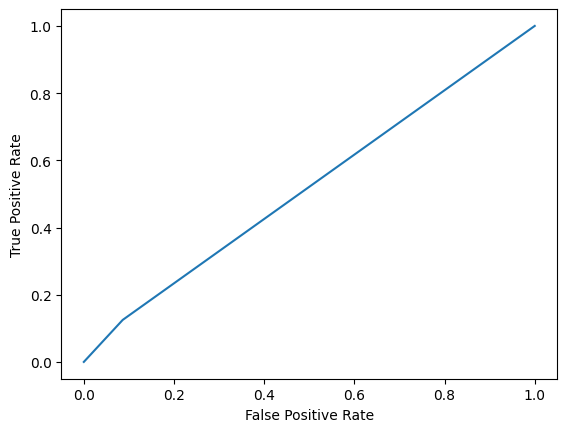

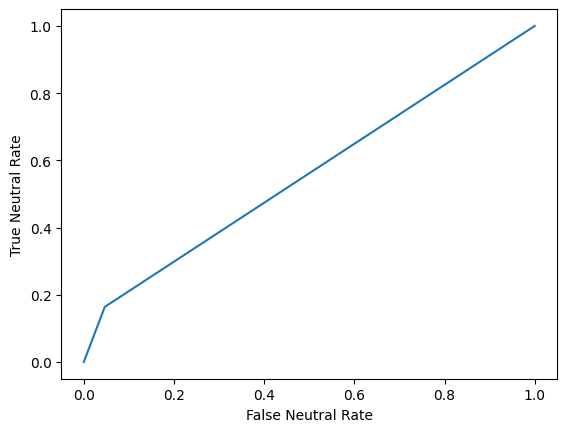

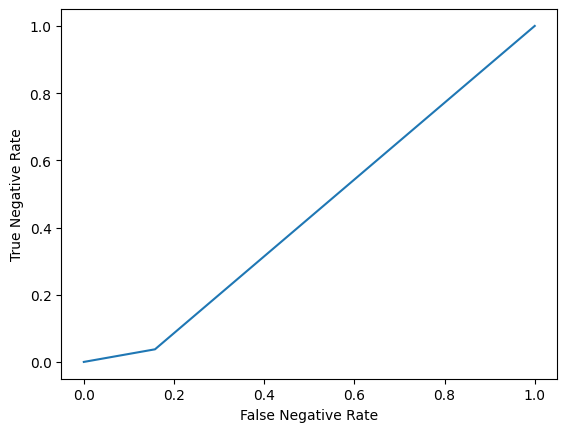

In [171]:
create_roc_curve(y_pred_pl, y_test_pl)

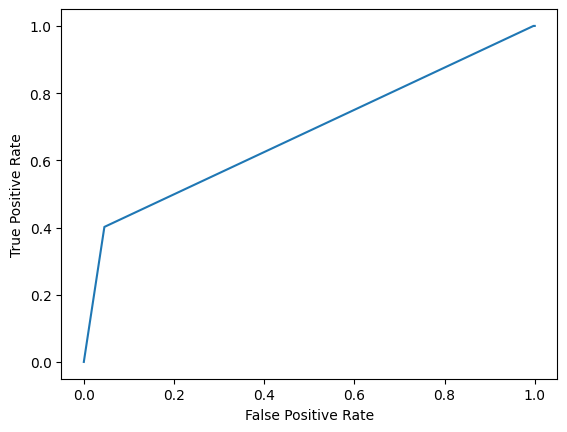

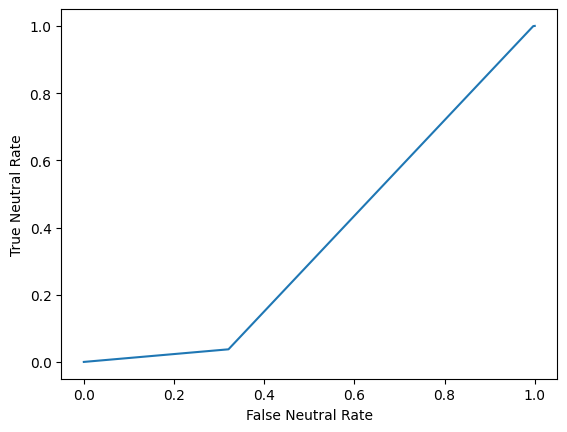

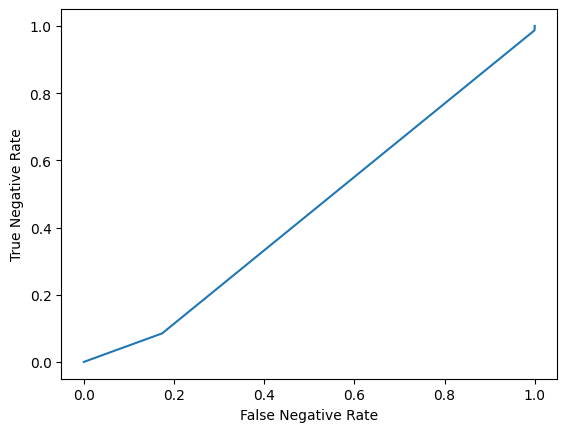

In [172]:
create_roc_curve(y_pred_en, y_test_en)

Support Vector Machine

In [173]:
from sklearn.svm import SVC

In [174]:
model_pl = SVC()
model_pl.fit(X_train_pl, y_train_pl)

SVC()

In [175]:
pickle.dump(model_pl, open('svm_pl.model', 'wb'))

In [176]:
model_en = SVC()
model_en.fit(X_train_en, y_train_en)

SVC()

In [177]:
pickle.dump(model_en, open('svm_en.model', 'wb'))

In [178]:
y_pred_pl = model_pl.predict(X_test_pl)

confusion_matrix(y_test_pl, y_pred_pl)

array([[1029,   89,    1],
       [ 427,  273,    2],
       [  73,   44,   11]], dtype=int64)

In [179]:
y_pred_en = model_en.predict(X_test_en)

confusion_matrix(y_test_en, y_pred_en)

array([[ 126,  151,   29],
       [  34, 1343,  115],
       [  14,  271,  606]], dtype=int64)

In [180]:
print(classification_report(y_test_pl, y_pred_pl))

              precision    recall  f1-score   support

          -1       0.67      0.92      0.78      1119
           0       0.67      0.39      0.49       702
           1       0.79      0.09      0.15       128

    accuracy                           0.67      1949
   macro avg       0.71      0.46      0.47      1949
weighted avg       0.68      0.67      0.63      1949



In [181]:
print(classification_report(y_test_en, y_pred_en))

              precision    recall  f1-score   support

          -1       0.72      0.41      0.53       306
           0       0.76      0.90      0.82      1492
           1       0.81      0.68      0.74       891

    accuracy                           0.77      2689
   macro avg       0.76      0.66      0.70      2689
weighted avg       0.77      0.77      0.76      2689



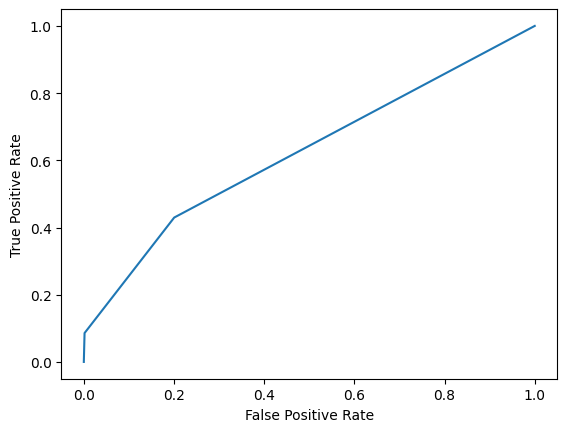

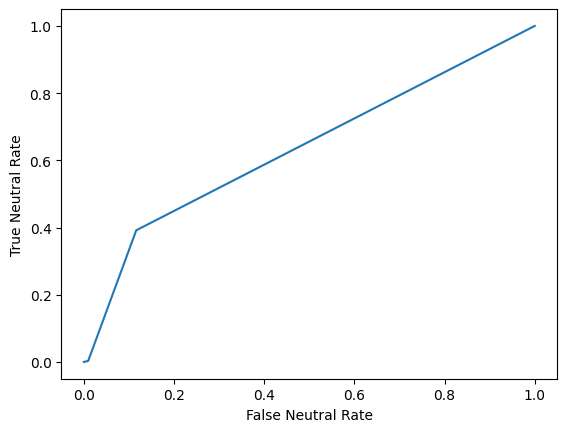

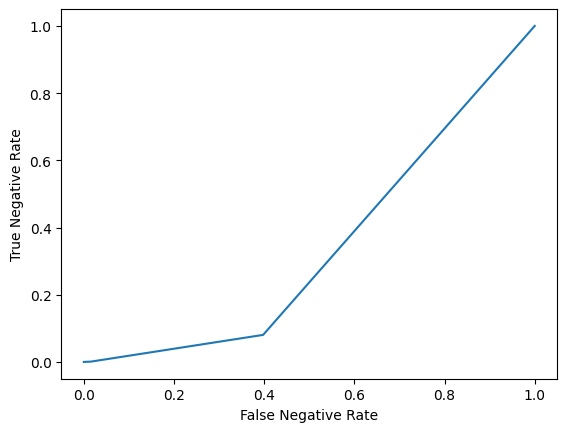

In [182]:
create_roc_curve(y_pred_pl, y_test_pl)

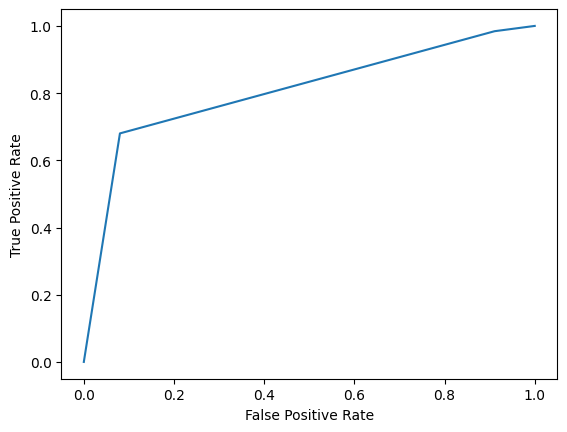

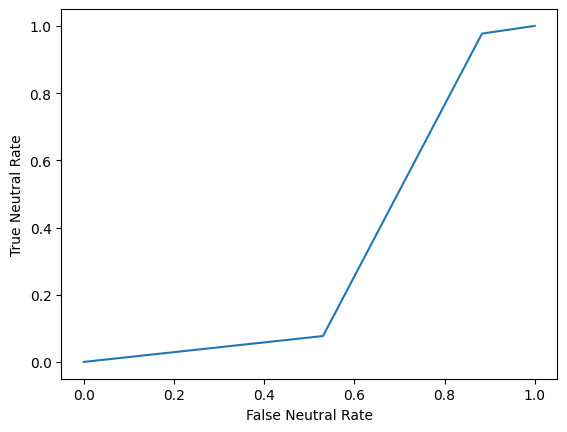

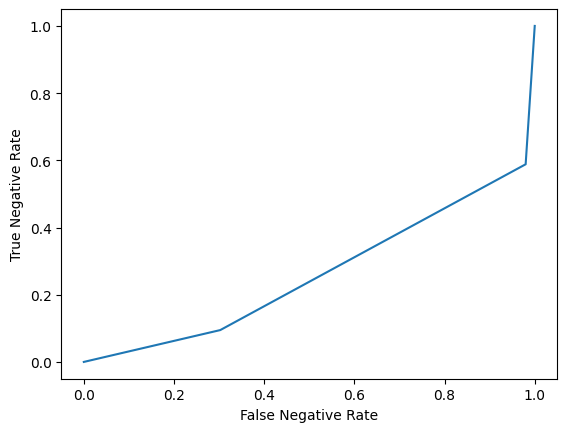

In [183]:
create_roc_curve(y_pred_en, y_test_en)

Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
model_pl = LogisticRegression(solver='liblinear', random_state=0)
model_pl.fit(X_train_pl, y_train_pl)

confusion_matrix(y_test_pl, y_pred_pl)

array([[1029,   89,    1],
       [ 427,  273,    2],
       [  73,   44,   11]], dtype=int64)

In [186]:
pickle.dump(model_pl, open('logistic_regression_pl.model', 'wb'))

In [187]:
model_en = LogisticRegression(solver='liblinear', random_state=0)
model_en.fit(X_train_en, y_train_en)

confusion_matrix(y_test_en, y_pred_en)

array([[ 126,  151,   29],
       [  34, 1343,  115],
       [  14,  271,  606]], dtype=int64)

In [188]:
pickle.dump(model_en, open('logistic_regression_en.model', 'wb'))

In [189]:
y_pred_pl = model_pl.predict(X_test_pl)

confusion_matrix(y_test_pl, y_pred_pl)

array([[1034,   84,    1],
       [ 422,  279,    1],
       [  70,   51,    7]], dtype=int64)

In [190]:
y_pred_en = model_en.predict(X_test_en)

confusion_matrix(y_test_en, y_pred_en)

array([[ 108,  157,   41],
       [  40, 1337,  115],
       [  14,  280,  597]], dtype=int64)

In [191]:
print(classification_report(y_test_pl, y_pred_pl))

              precision    recall  f1-score   support

          -1       0.68      0.92      0.78      1119
           0       0.67      0.40      0.50       702
           1       0.78      0.05      0.10       128

    accuracy                           0.68      1949
   macro avg       0.71      0.46      0.46      1949
weighted avg       0.68      0.68      0.64      1949



In [192]:
print(classification_report(y_test_en, y_pred_en))

              precision    recall  f1-score   support

          -1       0.67      0.35      0.46       306
           0       0.75      0.90      0.82      1492
           1       0.79      0.67      0.73       891

    accuracy                           0.76      2689
   macro avg       0.74      0.64      0.67      2689
weighted avg       0.76      0.76      0.75      2689



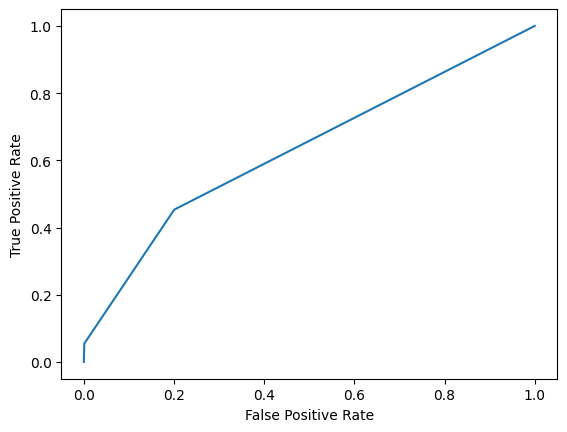

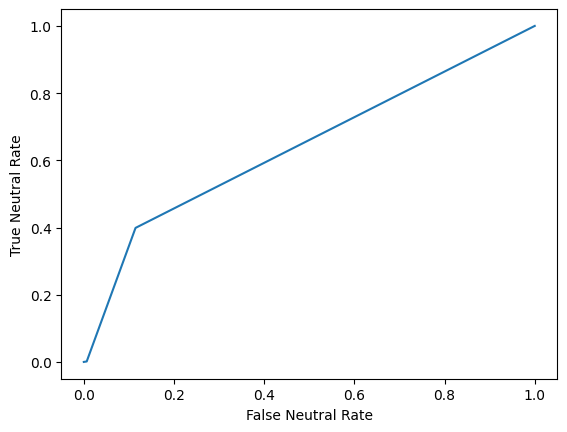

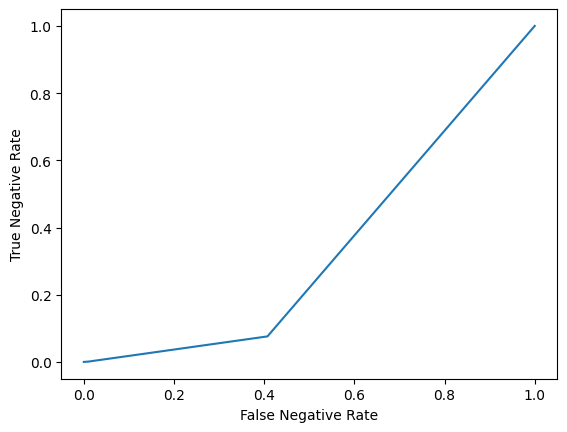

In [193]:
create_roc_curve(y_pred_pl, y_test_pl)

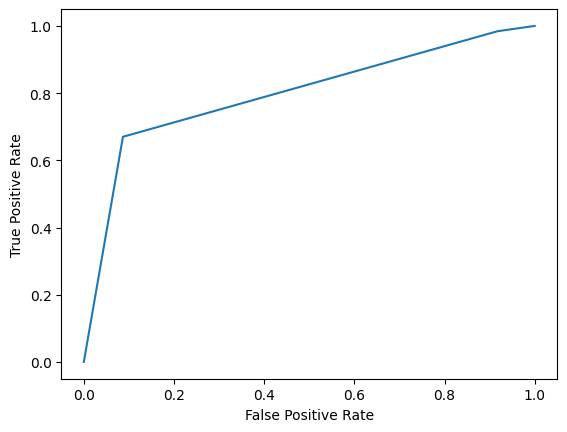

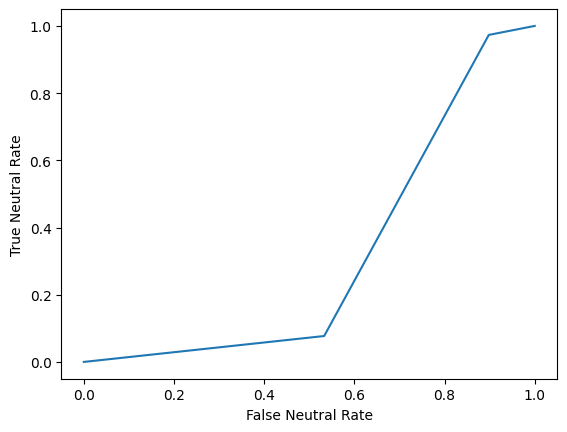

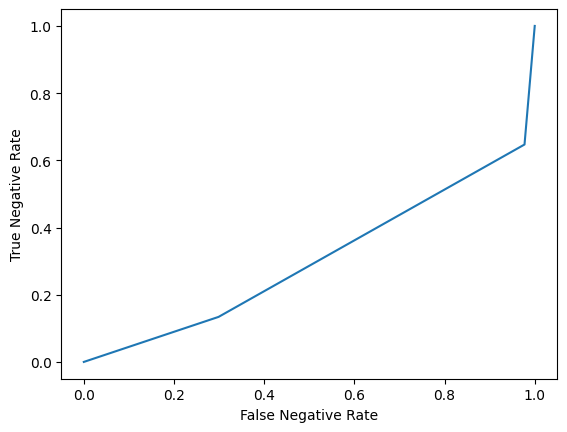

In [194]:
create_roc_curve(y_pred_en, y_test_en)

# BERT


In [195]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences, to_categorical
from sklearn.model_selection import train_test_split
import transformers
from transformers import AutoTokenizer, BertModel, BertTokenizerFast
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, RobertaForSequenceClassification
import pandas as pd
from datasets import Dataset
from datasets import load_metric
import numpy as np
import torch
from tensorflow.keras.callbacks import EarlyStopping
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
from datasets import Dataset

In [196]:
file_cleaned_pl = data_pl.drop(labels=['sentiment'], axis=1).reset_index(drop=True).rename(columns={'tweet':'text', 'target':'labels'})
file_cleaned_pl.labels.replace([1, 0, -1], [2, 1, 0], inplace=True)
file_cleaned_pl

,text,labels
0,od czas wpuszczec ukrainski zboze polski rynek...,1
1,za nikt tyle odebrac ukradnie pis wolec miec o...,0
2,minister podpisac dokument przyspieszyc transf...,1
3,pozytywny przekaz majstrowac komisarza pis wie...,1
4,platforma media atakowac klamstwo manipulacj d...,1
...,...,...
19485,mow siebie za dlugo obserwowac scena polityczn...,0
19486,dla kto eldorado emeryt rzadzacy dzieki progra...,1
19487,przestan dziewcze belkotac ! bzdura gaworzyc !...,0
19488,czyli wolec pan pis likwidacja panstwo ?,0


In [197]:
file_cleaned_en = data_en.drop(labels=['sentiment'], axis=1).reset_index(drop=True).rename(columns={'tweet':'text', 'target':'labels'})
file_cleaned_en.labels.replace([1, 0, -1], [2, 1, 0], inplace=True)
file_cleaned_en

,text,labels
0,united by music slogan year s esc we re look f...,2
1,junior eurovision 2023 hold nice november 26 !...,2
2,slovenia 5/10 same song like year europe vote ...,1
3,dear be wrong with you ? ? ? do not diligence ...,0
4,poland 7/10 still disqualification ? so sick h...,1
...,...,...
26879,you right slander germany year idc what be opi...,1
26880,so addition know 7 boy / male band eurovision2...,2
26881,be bang win eurovision 2023 ?,1
26882,this drill growl return eurovision !,1


In [198]:
dataset_pl = Dataset.from_pandas(file_cleaned_pl)
dataset_pl = dataset_pl.train_test_split(0.1)

In [199]:
dataset_en = Dataset.from_pandas(file_cleaned_en)
dataset_en = dataset_en.train_test_split(0.1)

In [200]:
print(dataset_en)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 24195
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 2689
    })
})


In [201]:
model_checkpoint_distilbert = 'distilbert-base-uncased'
batch_size = 64

In [202]:
model_checkpoint_roberta = 'roberta-base'
batch_size = 64

In [203]:
tokenizer_roberta = AutoTokenizer.from_pretrained(model_checkpoint_roberta, use_fast=True)
tokenizer_distilbert = AutoTokenizer.from_pretrained(model_checkpoint_distilbert, use_fast=True)

C:\Users\marci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\marci\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [204]:
def process_roberta(x):
  return tokenizer_roberta(x['text'])

def process_distilbert(x):
  return tokenizer_distilbert(x['text'])

train_ds_roberta_pl = dataset_pl['train'].map(process_roberta)
test_ds_roberta_pl = dataset_pl['test'].map(process_roberta)

train_ds_distilbert_pl = dataset_pl['train'].map(process_distilbert)
test_ds_distilbert_pl = dataset_pl['test'].map(process_distilbert)

In [205]:
train_ds_roberta_en = dataset_en['train'].map(process_roberta)
test_ds_roberta_en = dataset_en['test'].map(process_roberta)

train_ds_distilbert_en = dataset_en['train'].map(process_distilbert)
test_ds_distilbert_en = dataset_en['test'].map(process_distilbert)

In [206]:
num_labels = 3
model_distilbert = AutoModelForSequenceClassification.from_pretrained(model_checkpoint_distilbert, num_labels=num_labels)
model_roberta = RobertaForSequenceClassification.from_pretrained(model_checkpoint_roberta, num_labels=num_labels)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

In [207]:
args_distilbert = TrainingArguments(
    f'{model_checkpoint_distilbert}_sentiment_analysis',
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    num_train_epochs = 5,
    weight_decay = 0.02,
    load_best_model_at_end = True,
    metric_for_best_model = 'accuracy'
    
)

args_roberta = TrainingArguments(
    f'{model_checkpoint_roberta}_sentiment_analysis',
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    num_train_epochs = 5,
    weight_decay = 0.02,
    load_best_model_at_end = True,
    metric_for_best_model = 'accuracy'
    
)

In [208]:
metric = load_metric('glue', 'sst2')

def compute_metrics(eval_preds):
  logits, labels = eval_preds
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

C:\Users\marci\AppData\Local\Temp\ipykernel_18852\1346780335.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('glue', 'sst2')


In [209]:
train_ds_distilbert_en

Dataset({
    features: ['text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 24195
})

In [210]:
dataset_pl = dataset_pl.with_format("torch")
dataset_en = dataset_en.with_format("torch")

In [211]:
es = EarlyStopping(monitor='Accuracy', mode='max', patience=5, restore_best_weights=True)

In [213]:
trainer_distilbert_pl = Trainer(
    model_distilbert,
    args_distilbert,
    train_dataset=train_ds_distilbert_pl,
    eval_dataset=test_ds_distilbert_pl,
    tokenizer=tokenizer_distilbert,
    compute_metrics=compute_metrics,
)

trainer_distilbert_en = Trainer(
    model_distilbert,
    args_distilbert,
    train_dataset=train_ds_distilbert_en,
    eval_dataset=test_ds_distilbert_en,
    tokenizer=tokenizer_distilbert,
    compute_metrics=compute_metrics,
)

trainer_roberta_pl = Trainer(
    model_roberta,
    args_roberta,
    train_dataset=train_ds_roberta_pl,
    eval_dataset=test_ds_roberta_pl,
    tokenizer=tokenizer_roberta,
    compute_metrics=compute_metrics,
)

trainer_roberta_en = Trainer(
    model_roberta,
    args_roberta,
    train_dataset=train_ds_roberta_en,
    eval_dataset=test_ds_roberta_en,
    tokenizer=tokenizer_roberta,
    compute_metrics=compute_metrics,
)

In [214]:
trainer_roberta_pl.evaluate([train_ds_roberta_pl[0]])

***** Running Evaluation *****
  Num examples = 1
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
100%|██████████| 1/1 [00:00<00:00,  6.99it/s]


{'eval_loss': 0.9959756731987,
 'eval_accuracy': 1.0,
 'eval_runtime': 0.1506,
 'eval_samples_per_second': 6.642,
 'eval_steps_per_second': 6.642}

In [215]:
trainer_roberta_en.evaluate([train_ds_roberta_en[0]])

***** Running Evaluation *****
  Num examples = 1
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
100%|██████████| 1/1 [00:00<00:00, 34.24it/s]


{'eval_loss': 1.050121545791626,
 'eval_accuracy': 0.0,
 'eval_runtime': 0.0818,
 'eval_samples_per_second': 12.222,
 'eval_steps_per_second': 12.222}

In [216]:
trainer_distilbert_pl.evaluate([train_ds_distilbert_pl[0]])

***** Running Evaluation *****
  Num examples = 1
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
100%|██████████| 1/1 [00:00<00:00, 39.93it/s]


{'eval_loss': 1.0024689435958862,
 'eval_accuracy': 1.0,
 'eval_runtime': 0.0396,
 'eval_samples_per_second': 25.26,
 'eval_steps_per_second': 25.26}

In [217]:
trainer_distilbert_en.evaluate([train_ds_distilbert_en[0]])

***** Running Evaluation *****
  Num examples = 1
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
100%|██████████| 1/1 [00:00<00:00, 44.42it/s]


{'eval_loss': 1.1661440134048462,
 'eval_accuracy': 0.0,
 'eval_runtime': 0.042,
 'eval_samples_per_second': 23.811,
 'eval_steps_per_second': 23.811}

In [218]:
trainer_roberta_pl.train()

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
C:\Users\marci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 17541
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 1375
  Number of trainable parameters = 124647939
  2%|▏         | 21/1375 [12:07<1

KeyboardInterrupt: 

In [ ]:
trainer_roberta_en.train()

In [ ]:
trainer_distilbert_pl.train()

In [ ]:
trainer_distilbert_en.train()

In [ ]:
trainer_roberta_pl.save_model('trainer_roberta_pl.model')
trainer_roberta_en.save_model('trainer_roberta_en.model')
trainer_distilbert_pl.save_model('trainer_distilbert_pl.model')
trainer_distilbert_en.save_model('trainer_distilbert_en.model')

In [ ]:
trainer_roberta_pl.model
trainer_roberta_en.model
trainer_distilbert_pl.model
trainer_distilbert_en.model

In [ ]:
text_to_test = "PIS"  

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

inputs = tokenizer_roberta(text_to_test, return_tensors='pt')
input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

with torch.no_grad():
  output = model_roberta(input_ids=input_ids, attention_mask=attention_mask)
  logits = output.logits
  predictions = torch.argmax(logits, dim=-1)

predictions.item()
print('Roberta')
if predictions.item() == 0:
  print('This text is negative')
elif predictions.item() == 1 :
  print('This text is neutral')
else :
  print('This text is positive')

inputs = tokenizer_distilbert(text_to_test, return_tensors='pt')
input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

with torch.no_grad():
  output = model_distilbert(input_ids=input_ids, attention_mask=attention_mask)
  logits = output.logits
  predictions = torch.argmax(logits, dim=-1)

predictions.item()

print('Distilbert')
if predictions.item() == 0:
  print('This text is negative')
elif predictions.item() == 1 :
  print('This text is neutral')
else :
  print('This text is positive')

# LSTM - Język Polski



In [219]:
max_words = 5000
max_len = 200

tokenizer_lstm_pl = Tokenizer(num_words=max_words)

# przypasowanie do danych
tokenizer_lstm_pl.fit_on_texts(data_pl.tweet)
# tworzenie sekwencji ze stokanizowanego tekstu
sequences = tokenizer_lstm_pl.texts_to_sequences(data_pl.tweet)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  500    2  504]
 [   0    0    0 ...  501  464    3]
 [   0    0    0 ... 2968   88  788]
 ...
 [   0    0    0 ...    1  779   13]
 [   0    0    0 ...    1 1473   56]
 [   0    0    0 ... 4417 1100  640]]


In [220]:
# tworzenie etykiet
labels = to_categorical(data_pl.target, num_classes=3)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [223]:
model_lstm_pl = Sequential()
model_lstm_pl.add(layers.Embedding(max_words, 20))
model_lstm_pl.add(layers.LSTM(15, dropout=0.5))
model_lstm_pl.add(layers.Dense(3, activation='softmax'))

model_lstm_pl.compile(optimizer='rmsprop', 
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])

history_lstm_pl = model_lstm_pl.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
549/549 [==============================] - 19s 33ms/step - loss: 0.8429 - accuracy: 0.5855 - val_loss: 0.7872 - val_accuracy: 0.6398
Epoch 2/10
549/549 [==============================] - 19s 35ms/step - loss: 0.7459 - accuracy: 0.6553 - val_loss: 0.7444 - val_accuracy: 0.6588
Epoch 3/10
549/549 [==============================] - 18s 33ms/step - loss: 0.6964 - accuracy: 0.6901 - val_loss: 0.7053 - val_accuracy: 0.6834
Epoch 4/10
549/549 [==============================] - 19s 35ms/step - loss: 0.6656 - accuracy: 0.7061 - val_loss: 0.7010 - val_accuracy: 0.6788
Epoch 5/10
549/549 [==============================] - 20s 37ms/step - loss: 0.6453 - accuracy: 0.7149 - val_loss: 0.6896 - val_accuracy: 0.6891
Epoch 6/10
549/549 [==============================] - 20s 36ms/step - loss: 0.6278 - accuracy: 0.7223 - val_loss: 0.6773 - val_accuracy: 0.6891
Epoch 7/10
549/549 [==============================] - 18s 33ms/step - loss: 0.6165 - accuracy: 0.7306 - val_loss: 0.6825 - val_accuracy:

In [224]:
model_lstm_pl.save('lstm_pl.model')

INFO:tensorflow:Assets written to: lstm_pl.model\assets


INFO:tensorflow:Assets written to: lstm_pl.model\assets


LSTM



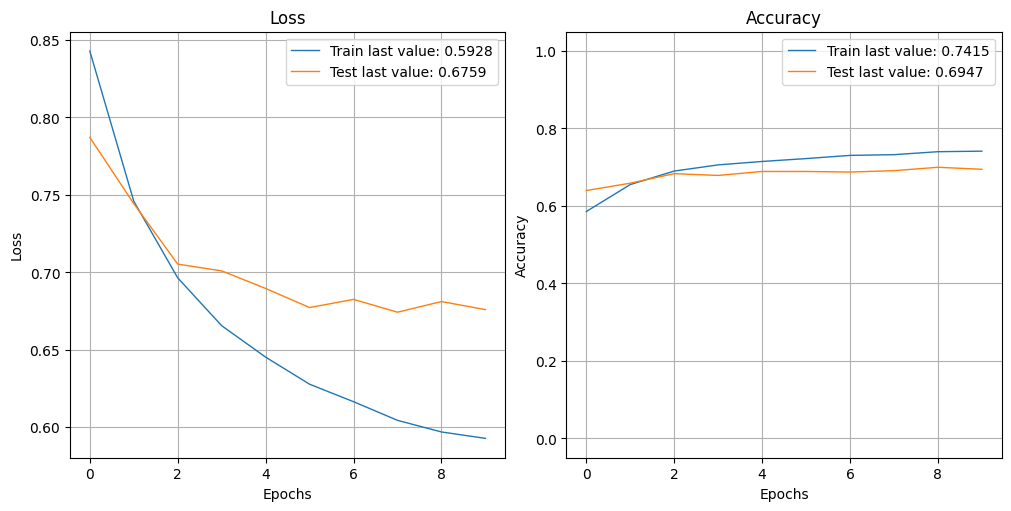

In [225]:
print(r'LSTM')
print()
show_history(history_lstm_pl)
plot_history(history_lstm_pl)
plt.close()

# LSTM - Język Angielski


In [226]:
max_words = 5000
max_len = 200

tokenizer_lstm_en = Tokenizer(num_words=max_words)

# przypasowanie do danych
tokenizer_lstm_en.fit_on_texts(data_en.tweet)
# tworzenie sekwencji ze stokanizowanego tekstu
sequences = tokenizer_lstm_en.texts_to_sequences(data_en.tweet)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  816  114  100]
 [   0    0    0 ... 2494    1 1272]
 [   0    0    0 ...    6    9    1]
 ...
 [   0    0    0 ...   24    1    7]
 [   0    0    0 ... 3751  467    1]
 [   0    0    0 ...  304   11    1]]


In [227]:
# tworzenie etykiet
labels = to_categorical(data_en.target, num_classes=3)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [229]:
model_lstm_en = Sequential()
model_lstm_en.add(layers.Embedding(max_words, 20))
model_lstm_en.add(layers.LSTM(15, dropout=0.5))
model_lstm_en.add(layers.Dense(3, activation='softmax'))

model_lstm_en.compile(optimizer='rmsprop', 
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])

history_lstm_en = model_lstm_en.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
757/757 [==============================] - 30s 36ms/step - loss: 0.8386 - accuracy: 0.6106 - val_loss: 0.7348 - val_accuracy: 0.6687
Epoch 2/10
757/757 [==============================] - 27s 36ms/step - loss: 0.6619 - accuracy: 0.7195 - val_loss: 0.6224 - val_accuracy: 0.7330
Epoch 3/10
757/757 [==============================] - 27s 36ms/step - loss: 0.5943 - accuracy: 0.7530 - val_loss: 0.6060 - val_accuracy: 0.7441
Epoch 4/10
757/757 [==============================] - 24s 32ms/step - loss: 0.5641 - accuracy: 0.7678 - val_loss: 0.5829 - val_accuracy: 0.7538
Epoch 5/10
757/757 [==============================] - 24s 32ms/step - loss: 0.5400 - accuracy: 0.7807 - val_loss: 0.5616 - val_accuracy: 0.7612
Epoch 6/10
757/757 [==============================] - 25s 32ms/step - loss: 0.5229 - accuracy: 0.7878 - val_loss: 0.5729 - val_accuracy: 0.7586
Epoch 7/10
757/757 [==============================] - 24s 32ms/step - loss: 0.5119 - accuracy: 0.7950 - val_loss: 0.5599 - val_accuracy:

In [230]:
model_lstm_en.save('lstm_en.model')

INFO:tensorflow:Assets written to: lstm_en.model\assets


INFO:tensorflow:Assets written to: lstm_en.model\assets


LSTM



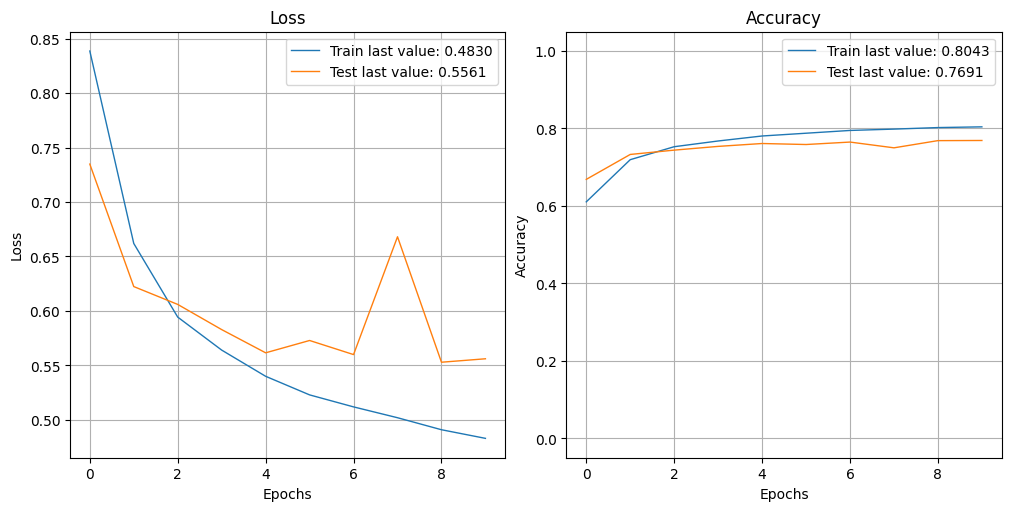

In [231]:
print(r'LSTM')
print()
show_history(history_lstm_en)
plot_history(history_lstm_en)
plt.close()

# BLSTM - Język Polski


In [232]:
max_words = 5000
max_len = 200

tokenizer_blstm_pl = Tokenizer(num_words=max_words)

# przypasowanie do danych
tokenizer_blstm_pl.fit_on_texts(data_pl.tweet)
# tworzenie sekwencji ze stokanizowanego tekstu
sequences = tokenizer_blstm_pl.texts_to_sequences(data_pl.tweet)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  500    2  504]
 [   0    0    0 ...  501  464    3]
 [   0    0    0 ... 2968   88  788]
 ...
 [   0    0    0 ...    1  779   13]
 [   0    0    0 ...    1 1473   56]
 [   0    0    0 ... 4417 1100  640]]


In [233]:
# tworzenie etykiet
labels = to_categorical(data_pl.target, num_classes=3)

In [234]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [235]:
model_blstm_pl = Sequential()

model_blstm_pl.add(layers.Embedding(max_words, 40))
model_blstm_pl.add(layers.Bidirectional(layers.LSTM(20, dropout=0.6)))
model_blstm_pl.add(layers.Dense(3, activation='softmax'))

model_blstm_pl.compile(optimizer='rmsprop', 
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])

history_blstm_pl = model_blstm_pl.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
549/549 [==============================] - 28s 46ms/step - loss: 0.8466 - accuracy: 0.5841 - val_loss: 0.7951 - val_accuracy: 0.6326
Epoch 2/10
549/549 [==============================] - 23s 42ms/step - loss: 0.7491 - accuracy: 0.6520 - val_loss: 0.7437 - val_accuracy: 0.6578
Epoch 3/10
549/549 [==============================] - 24s 43ms/step - loss: 0.7013 - accuracy: 0.6832 - val_loss: 0.7086 - val_accuracy: 0.6742
Epoch 4/10
549/549 [==============================] - 26s 47ms/step - loss: 0.6713 - accuracy: 0.6976 - val_loss: 0.7114 - val_accuracy: 0.6655
Epoch 5/10
549/549 [==============================] - 23s 42ms/step - loss: 0.6528 - accuracy: 0.7044 - val_loss: 0.6929 - val_accuracy: 0.6875
Epoch 6/10
549/549 [==============================] - 24s 44ms/step - loss: 0.6344 - accuracy: 0.7185 - val_loss: 0.6850 - val_accuracy: 0.6845
Epoch 7/10
549/549 [==============================] - 20s 37ms/step - loss: 0.6225 - accuracy: 0.7271 - val_loss: 0.6800 - val_accuracy:

In [236]:
model_blstm_pl.save('blstm_pl.model')

INFO:tensorflow:Assets written to: blstm_pl.model\assets


INFO:tensorflow:Assets written to: blstm_pl.model\assets


BLSTM



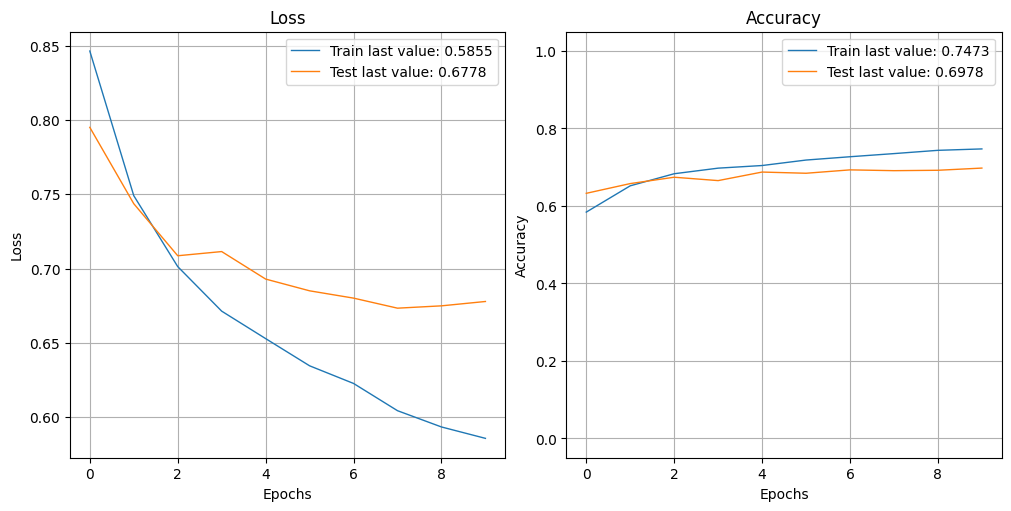

In [237]:
print(r'BLSTM')
print()
show_history(history_blstm_pl)
plot_history(history_blstm_pl)
plt.close()

# BLSTM - Język Angielski

In [238]:
max_words = 5000
max_len = 200

tokenizer_blstm_en = Tokenizer(num_words=max_words)

# przypasowanie do danych
tokenizer_blstm_en.fit_on_texts(data_en.tweet)
# tworzenie sekwencji ze stokanizowanego tekstu
sequences = tokenizer_blstm_en.texts_to_sequences(data_en.tweet)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  816  114  100]
 [   0    0    0 ... 2494    1 1272]
 [   0    0    0 ...    6    9    1]
 ...
 [   0    0    0 ...   24    1    7]
 [   0    0    0 ... 3751  467    1]
 [   0    0    0 ...  304   11    1]]


In [239]:
# tworzenie etykiet
labels = to_categorical(data_en.target, num_classes=3)

In [240]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [241]:
model_blstm_en = Sequential()

model_blstm_en.add(layers.Embedding(max_words, 40))
model_blstm_en.add(layers.Bidirectional(layers.LSTM(20, dropout=0.6)))
model_blstm_en.add(layers.Dense(3, activation='softmax'))

model_blstm_en.compile(optimizer='rmsprop', 
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])

history_blstm_en = model_blstm_en.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
757/757 [==============================] - 36s 44ms/step - loss: 0.8227 - accuracy: 0.6292 - val_loss: 0.7375 - val_accuracy: 0.6835
Epoch 2/10
757/757 [==============================] - 32s 43ms/step - loss: 0.6664 - accuracy: 0.7218 - val_loss: 0.6260 - val_accuracy: 0.7322
Epoch 3/10
757/757 [==============================] - 32s 43ms/step - loss: 0.5940 - accuracy: 0.7547 - val_loss: 0.6097 - val_accuracy: 0.7423
Epoch 4/10
757/757 [==============================] - 35s 46ms/step - loss: 0.5544 - accuracy: 0.7758 - val_loss: 0.5849 - val_accuracy: 0.7538
Epoch 5/10
757/757 [==============================] - 32s 42ms/step - loss: 0.5311 - accuracy: 0.7837 - val_loss: 0.5699 - val_accuracy: 0.7702
Epoch 6/10
757/757 [==============================] - 33s 44ms/step - loss: 0.5134 - accuracy: 0.7931 - val_loss: 0.5581 - val_accuracy: 0.7661
Epoch 7/10
757/757 [==============================] - 32s 43ms/step - loss: 0.4984 - accuracy: 0.7990 - val_loss: 0.5599 - val_accuracy:

In [242]:
model_blstm_en.save('blstm_en.model')

INFO:tensorflow:Assets written to: blstm_en.model\assets


INFO:tensorflow:Assets written to: blstm_en.model\assets


BLSTM



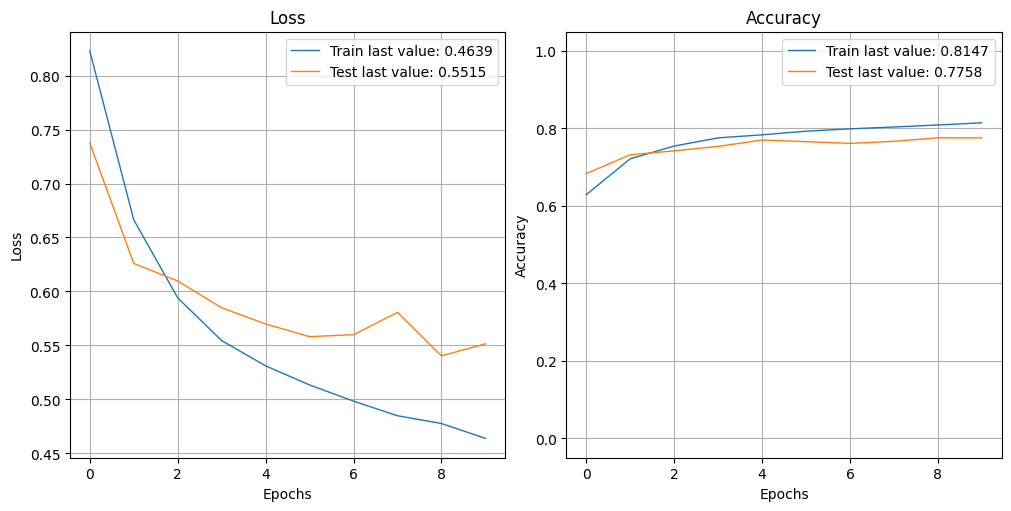

In [243]:
print(r'BLSTM')
print()
show_history(history_blstm_en)
plot_history(history_blstm_en)
plt.close()

# Sieć Splotowa (CNN) - Język Polski

In [244]:
max_words = 5000
max_len = 200

tokenizer_cnn_pl = Tokenizer(num_words=max_words)

# przypasowanie do danych
tokenizer_cnn_pl.fit_on_texts(data_pl.tweet)
# tworzenie sekwencji ze stokanizowanego tekstu
sequences = tokenizer_cnn_pl.texts_to_sequences(data_pl.tweet)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  500    2  504]
 [   0    0    0 ...  501  464    3]
 [   0    0    0 ... 2968   88  788]
 ...
 [   0    0    0 ...    1  779   13]
 [   0    0    0 ...    1 1473   56]
 [   0    0    0 ... 4417 1100  640]]


In [245]:
# tworzenie etykiet
labels = to_categorical(data_pl.target, num_classes=3)

In [246]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [247]:
model_cnn_pl = Sequential()

model_cnn_pl.add(layers.Embedding(max_words, 40, input_length=max_len))
model_cnn_pl.add(layers.Conv1D(20, 6, activation='relu'))
model_cnn_pl.add(layers.MaxPooling1D(5))
model_cnn_pl.add(layers.Conv1D(20, 6, activation='relu'))
model_cnn_pl.add(layers.GlobalMaxPooling1D())
model_cnn_pl.add(layers.Dense(3, activation='softmax'))

model_cnn_pl.compile(optimizer='rmsprop', 
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])

history_cnn_pl = model_cnn_pl.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
549/549 [==============================] - 5s 8ms/step - loss: 0.8379 - accuracy: 0.5882 - val_loss: 0.7707 - val_accuracy: 0.6593
Epoch 2/10
549/549 [==============================] - 5s 9ms/step - loss: 0.7163 - accuracy: 0.6748 - val_loss: 0.7181 - val_accuracy: 0.6870
Epoch 3/10
549/549 [==============================] - 4s 8ms/step - loss: 0.6443 - accuracy: 0.7187 - val_loss: 0.7057 - val_accuracy: 0.6839
Epoch 4/10
549/549 [==============================] - 4s 8ms/step - loss: 0.5803 - accuracy: 0.7575 - val_loss: 0.7170 - val_accuracy: 0.6752
Epoch 5/10
549/549 [==============================] - 5s 9ms/step - loss: 0.5053 - accuracy: 0.7924 - val_loss: 0.7369 - val_accuracy: 0.6685
Epoch 6/10
549/549 [==============================] - 5s 9ms/step - loss: 0.4196 - accuracy: 0.8344 - val_loss: 0.7628 - val_accuracy: 0.6665
Epoch 7/10
549/549 [==============================] - 4s 8ms/step - loss: 0.3352 - accuracy: 0.8693 - val_loss: 0.8237 - val_accuracy: 0.6762
Epoch 

In [248]:
model_cnn_pl.save('cnn_pl.model')

INFO:tensorflow:Assets written to: cnn_pl.model\assets


INFO:tensorflow:Assets written to: cnn_pl.model\assets


Sieć spolotwa



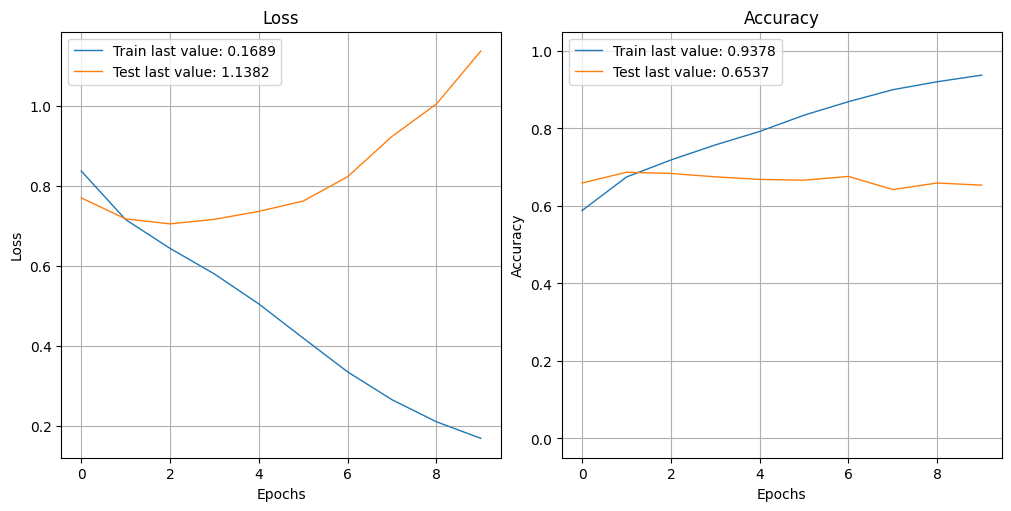

In [249]:
print(r'Sieć spolotwa')
print()
show_history(history_cnn_pl)
plot_history(history_cnn_pl)
plt.close()

# Sieć Splotowa (CNN) - Język Angielski

In [250]:
max_words = 5000
max_len = 200

tokenizer_cnn_en = Tokenizer(num_words=max_words)

# przypasowanie do danych
tokenizer_cnn_en.fit_on_texts(data_en.tweet)
# tworzenie sekwencji ze stokanizowanego tekstu
sequences = tokenizer_cnn_en.texts_to_sequences(data_en.tweet)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  816  114  100]
 [   0    0    0 ... 2494    1 1272]
 [   0    0    0 ...    6    9    1]
 ...
 [   0    0    0 ...   24    1    7]
 [   0    0    0 ... 3751  467    1]
 [   0    0    0 ...  304   11    1]]


In [251]:
# tworzenie etykiet
labels = to_categorical(data_en.target, num_classes=3)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [253]:
model_cnn_en = Sequential()

model_cnn_en.add(layers.Embedding(max_words, 40, input_length=max_len))
model_cnn_en.add(layers.Conv1D(20, 6, activation='relu'))
model_cnn_en.add(layers.MaxPooling1D(5))
model_cnn_en.add(layers.Conv1D(20, 6, activation='relu'))
model_cnn_en.add(layers.GlobalMaxPooling1D())
model_cnn_en.add(layers.Dense(3, activation='softmax'))

model_cnn_en.compile(optimizer='rmsprop', 
               loss= 'categorical_crossentropy',
               metrics=['accuracy'])

history_cnn_en = model_cnn_en.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
757/757 [==============================] - 7s 8ms/step - loss: 0.7875 - accuracy: 0.6503 - val_loss: 0.6554 - val_accuracy: 0.7181
Epoch 2/10
757/757 [==============================] - 6s 9ms/step - loss: 0.5648 - accuracy: 0.7678 - val_loss: 0.5800 - val_accuracy: 0.7546
Epoch 3/10
757/757 [==============================] - 7s 9ms/step - loss: 0.4699 - accuracy: 0.8129 - val_loss: 0.5576 - val_accuracy: 0.7635
Epoch 4/10
757/757 [==============================] - 6s 8ms/step - loss: 0.4033 - accuracy: 0.8405 - val_loss: 0.6071 - val_accuracy: 0.7464
Epoch 5/10
757/757 [==============================] - 5s 7ms/step - loss: 0.3429 - accuracy: 0.8696 - val_loss: 0.5539 - val_accuracy: 0.7858
Epoch 6/10
757/757 [==============================] - 6s 8ms/step - loss: 0.2864 - accuracy: 0.8933 - val_loss: 0.6616 - val_accuracy: 0.7579
Epoch 7/10
757/757 [==============================] - 5s 7ms/step - loss: 0.2348 - accuracy: 0.9159 - val_loss: 0.6904 - val_accuracy: 0.7635
Epoch 

In [254]:
model_cnn_en.save('cnn_en.model')

INFO:tensorflow:Assets written to: cnn_en.model\assets


INFO:tensorflow:Assets written to: cnn_en.model\assets


Sieć spolotwa



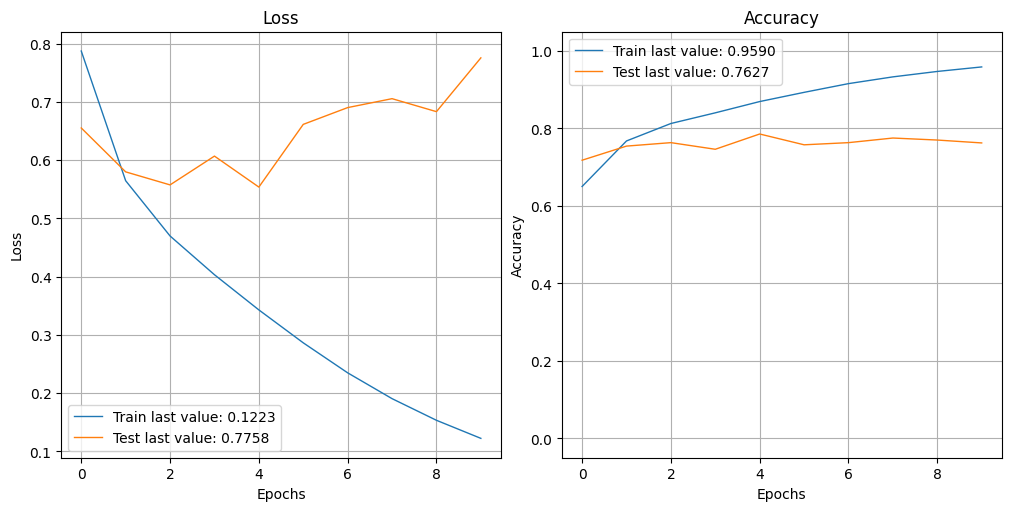

In [255]:
print(r'Sieć spolotwa')
print()
show_history(history_cnn_en)
plot_history(history_cnn_en)
plt.close()

# Test LSTM, BLSTM, CNN - Język Polski


In [256]:
predict(model_lstm_pl, ['Polska jest krajem w Europie'], tokenizer_lstm_pl)

1/1 - 0s - 269ms/epoch - 269ms/step
[0.50998765 0.25927714 0.2307353 ]
['Polska jest krajem w Europie']
Predicted sentiment :  Negative


In [257]:
predict(model_blstm_pl, ['Polska jest krajem w Europie'], tokenizer_blstm_pl)

1/1 - 0s - 439ms/epoch - 439ms/step
[0.51446456 0.26570708 0.21982835]
['Polska jest krajem w Europie']
Predicted sentiment :  Negative


In [258]:
predict(model_cnn_pl, ['Polska jest krajem w Europie'], tokenizer_cnn_pl)

1/1 - 0s - 51ms/epoch - 51ms/step
[0.2807384  0.6240347  0.09522685]
['Polska jest krajem w Europie']
Predicted sentiment :  Neutral


# Test LSTM, BLSTM, CNN - Język Angielski

In [259]:
predict(model_lstm_en, ['Poland is a country in Europe'], tokenizer_lstm_en)

1/1 - 0s - 283ms/epoch - 283ms/step
[0.9487848 0.0384717 0.0127434]
['Poland is a country in Europe']
Predicted sentiment :  Negative


In [260]:
predict(model_blstm_en, ['Poland is a country in Europe'], tokenizer_blstm_en)

1/1 - 0s - 410ms/epoch - 410ms/step
[0.9568995  0.02908268 0.01401777]
['Poland is a country in Europe']
Predicted sentiment :  Negative


In [261]:
predict(model_cnn_en, ['Poland is a country in Europe'], tokenizer_cnn_en)

1/1 - 0s - 50ms/epoch - 50ms/step
[0.91833186 0.03555026 0.04611787]
['Poland is a country in Europe']
Predicted sentiment :  Negative
